<a href="https://colab.research.google.com/github/lauratsang/MapChallenge/blob/main/Starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import requests
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
import re
import folium
import json
import fiona
from folium import plugins
import geopy.distance
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [37]:
url = 'https://www.starbucks.com/store-locator?map=40.086335,-74.305655,8z&place=Brick%20Township,%20NJ,%20USA'
response = requests.get(url)

In [38]:
#response.status_code

200

In [39]:
#response.text

'<!DOCTYPE html>\n<html lang="en-US" class="no-js fonts-loading">\n\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta property="twitter:card" content="summary">\n    <meta property="twitter:site" content="@starbucks">\n    <meta property="twitter:creator" content="@starbucksprtnrs">\n    <meta property="og:title" content="Starbucks®">\n    <meta property="og:image" data-hid="image" content="https://app.starbucks.com/weblx/images/social/summary_square.png">\n    <meta property="twitter:image" data-hid="twitter:image" content="https://app.starbucks.com/weblx/images/social/summary_image.png">\n    \n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">\n    <script src=\'/vendor/static/vendor2.js\'></script>\n    <script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"671cca5e0f","applicationID":"

In [40]:
re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)

[('40.05847', '-74.14968'),
 ('40.05542', '-74.16432'),
 ('40.0256', '-74.1434'),
 ('40.04574', '-74.22438'),
 ('39.98792', '-74.17413'),
 ('39.98648', '-74.17903'),
 ('39.98029', '-74.1779'),
 ('40.12664', '-74.22177'),
 ('40.13124', '-74.22138'),
 ('40.13875', '-74.06123'),
 ('39.95495', '-74.16127'),
 ('40.15738', '-74.05388'),
 ('40.16541', '-74.05116'),
 ('40.1983', '-74.09911'),
 ('40.22454', '-74.09429'),
 ('40.21024', '-74.25772'),
 ('40.22852', '-74.04513'),
 ('40.23139', '-74.04494'),
 ('39.85971', '-74.20539'),
 ('40.26471', '-74.04241'),
 ('40.24051', '-74.30535'),
 ('40.2534', '-74.30019'),
 ('40.28974', '-74.04725'),
 ('40.29187', '-74.05331'),
 ('40.15563', '-74.42833'),
 ('40.29128', '-74.30186'),
 ('40.30053', '-73.97893'),
 ('40.33207', '-74.11904'),
 ('40.30854', '-74.30362'),
 ('40.33312', '-74.06129'),
 ('40.35075', '-74.06557'),
 ('39.75949', '-74.24626'),
 ('40.35106', '-74.30692'),
 ('40.3541', '-74.3078'),
 ('40.39856', '-74.11102'),
 ('40.31606', '-74.43965'),

In [41]:
def get_store_lat_lngs(zcode):
  request = f'https://www.starbucks.com/store-locator?place={zcode}'
  response = requests.get(request)
  lat_lngs = re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)
  lat_lngs = [(float(item[0]), float(item[1])) for item in lat_lngs]
  return lat_lngs

## **Get all Starbucks locations using above function**



In [42]:
oc_zips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zipcodes_oceanco.csv')

In [43]:
oc_zips['Zipcode'] = oc_zips['Zipcode'].astype(str)
oc_zips['Zipcode'] = oc_zips['Zipcode'].str.zfill(5)

In [44]:
starbucks_locs = []

In [45]:
for i,zcode in enumerate(oc_zips.Zipcode.values):
  print(f'{i} / {len(oc_zips)}')
  starbucks_locs += get_store_lat_lngs(zcode)

0 / 49
1 / 49
2 / 49
3 / 49
4 / 49
5 / 49
6 / 49
7 / 49
8 / 49
9 / 49
10 / 49
11 / 49
12 / 49
13 / 49
14 / 49
15 / 49
16 / 49
17 / 49
18 / 49
19 / 49
20 / 49
21 / 49
22 / 49
23 / 49
24 / 49
25 / 49
26 / 49
27 / 49
28 / 49
29 / 49
30 / 49
31 / 49
32 / 49
33 / 49
34 / 49
35 / 49
36 / 49
37 / 49
38 / 49
39 / 49
40 / 49
41 / 49
42 / 49
43 / 49
44 / 49
45 / 49
46 / 49
47 / 49
48 / 49


In [46]:
starbucks_locs = set(starbucks_locs)

In [47]:
starbucks_locs = list(starbucks_locs)

In [48]:
len(starbucks_locs)

110

In [49]:
starbucks_locs

[(40.24051, -74.30535),
 (40.03594, -74.82203),
 (40.33312, -74.06129),
 (40.41181, -74.13513),
 (40.38266, -74.30944),
 (40.15738, -74.05388),
 (39.95495, -74.16127),
 (39.972, -74.91044),
 (40.3541, -74.3078),
 (39.73318, -75.03979),
 (39.75514, -75.04618),
 (40.26471, -74.04241),
 (40.23139, -74.04494),
 (39.98792, -74.17413),
 (40.29778, -74.68173),
 (39.74731, -74.99403),
 (40.1983, -74.09911),
 (40.27723, -74.54097),
 (39.3301, -74.49949),
 (40.21024, -74.25772),
 (39.73506, -75.00732),
 (40.24944, -74.68786),
 (39.44683, -74.63398),
 (40.46647, -74.28941),
 (39.85971, -74.20539),
 (40.30053, -73.97893),
 (40.2534, -74.30019),
 (40.17682, -74.87778),
 (39.89542, -74.94373),
 (39.98029, -74.1779),
 (40.03631, -74.82537),
 (39.46453, -74.49667),
 (39.75949, -74.24626),
 (39.97103, -74.87639),
 (40.32103, -74.48819),
 (40.39856, -74.11102),
 (40.41017, -74.04098),
 (40.46205, -74.29515),
 (39.98229, -74.80496),
 (40.12664, -74.22177),
 (40.40914, -74.23426),
 (39.27555, -74.56997),


## **Distance to the Closest Starbucks**

In [50]:
lat, lon = zip(*starbucks_locs)

In [51]:
dist_matrix = np.empty((len(starbucks_locs), len(starbucks_locs)))
for i1,s1 in enumerate(starbucks_locs):
  for i2,s2 in enumerate(starbucks_locs):
    if i1 <= i2:
      d = geopy.distance.geodesic(s1, s2).mi
      dist_matrix[i1,i2] = d
      dist_matrix[i2,i1] = d

In [52]:
np.fill_diagonal(dist_matrix, np.inf)

In [53]:
closest_locs = np.argmin(dist_matrix, axis=0)
closest_dists = dist_matrix[np.arange(len(starbucks_locs)), closest_locs]

In [57]:
#map of Ocean county
with open('/content/drive/MyDrive/Colab Notebooks/oc_map.geojson') as f:
    ocArea = json.load(f)

oc_lng_lats = ocArea['features'][0]['geometry']['coordinates'][0][0]
polygon = Polygon(oc_lng_lats)

In [62]:
#initialize the map around Ocean County
ocMap = folium.Map(location=[39.902047, -74.281488], zoom_start=9)

#add the shape of Ocean County to the map
folium.GeoJson(ocArea).add_to(ocMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for lat,lng in starbucks_locs:
    if polygon.contains(Point(lng,lat)):
        folium.CircleMarker((lat, lng), radius=4, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(ocMap)

closest_dists_lim = []
closest_locs = np.argmin(dist_matrix, axis=0)
for i1,s1 in enumerate(starbucks_locs):
    if polygon.contains(Point(s1[1],s1[0])):
        s2 = starbucks_locs[closest_locs[i1]]
        d = round(closest_dists[i1], 2)
        folium.PolyLine([s1,s2], color='black', popup=f'{d} miles', fontsize=20).add_to(ocMap)
        closest_dists_lim.append(d)
closest_dists_lim = np.array(closest_dists_lim)

In [65]:
ocMap

In [63]:
#save the map as an html
ocMap.save('/content/drive/MyDrive/Colab Notebooks/ocSbuxMap.html')

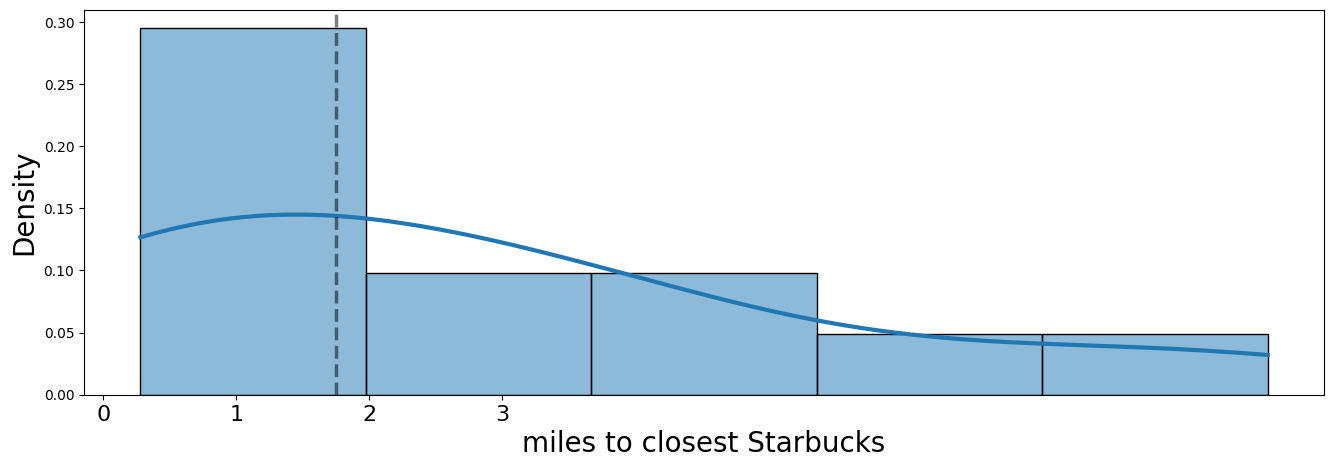

In [64]:
plt.figure(figsize=(16,5))
sns.histplot(closest_dists_lim, kde=True, line_kws={'linewidth': 3}, stat='density')
plt.xlabel('miles to closest Starbucks', fontsize=20)
plt.xticks(np.arange(0, 3.1), fontsize=16)
plt.ylabel('Density', fontsize=20)
plt.axvline(np.mean(closest_dists), color='k', linestyle='--', linewidth=2.5, alpha=0.5)